# Limpieza de bienes raíces

Este es un conjunto de datos (dataset) reales que fue descargado usando técnicas de web scraping. La data contiene registros de **Fotocasa**, el cual es uno de los sitios más populares de bienes raíces en España. Por favor no hagas esto (web scraping) a no ser que sea para propósitos académicos.

El dataset fue descargado hace algunos años por Henry Navarro y en ningún caso se obtuvo beneficio económico de ello.

Contiene miles de datos de casas reales publicadas en la web www.fotocasa.com. Tu objetivo es extraer tanta información como sea posible con el conocimiento que tienes hasta ahora de ciencia de datos, por ejemplo ¿cuál es la casa más cara en todo el dataset?

Empecemos precisamente con esa pregunta... ¡Buena suerte!

#### Ejercicio 00. Lee el dataset assets/real_estate.csv e intenta visualizar la tabla (★☆☆)

In [3]:
import pandas as pd

# Este archivo contiene punto y coma en lugar de coma como separador
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### Ejercicio 01. ¿Cuál es la casa más cara en todo el dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle del Prado, Nº20 es la más cara y su precio es de 5000000 USD`

In [4]:
# Obtener la casa con el precio más alto
most_expensive_house = ds.sort_values(by='price', ascending=False)[["price", "address"]].head(1)

# Imprimir el resultado
print(f"La casa con dirección {most_expensive_house['address'].values[0]} es la más cara y su precio es de {most_expensive_house['price'].values[0]} USD.")

La casa con dirección El Escorial es la más cara y su precio es de 8500000 USD.


#### Ejercicio 02. ¿Cuál es la casa más barata del dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle Alcalá, Nº58 es la más barata y su precio es de 12000 USD`

In [17]:
# Verificar 'price' sea numérico y filtrar valores inválidos y mayores a 0
ds['price'] = pd.to_numeric(ds['price'], errors='coerce')
cheapest_house = ds.dropna(subset=['price']).loc[ds['price'] > 0].sort_values(by='price').head(1)

# Imprimir el resultado
if not cheapest_house.empty:
    print(f"La casa con dirección {cheapest_house['address'].values[0]} es la más barata y su precio es de {cheapest_house['price'].values[0]} USD.")
else:
    print("No se encontraron casas con precio válido en el dataset.")

La casa con dirección Berlin, Coslada es la más barata y su precio es de 600 USD.


#### Ejercicio 03. ¿Cuál es la casa más grande y la más pequeña del dataset? (★☆☆)

Imprime la dirección y el área de las casas seleccionadas. Por ejemplo:

`La casa más grande está ubicada en Calle Gran Vía, Nº38 y su superficie es de 5000 metros`

`La casa más pequeña está ubicada en Calle Mayor, Nº12 y su superficie es de 200 metros`

In [6]:
indice_mayor = ds.surface.idxmax()
indice_menor = ds.surface.idxmin()
print(f'La casa más grande está ubicada en {ds.address[indice_mayor]} y su superficie es {ds.surface[indice_mayor]} metros. \nLa más pequeña está ubicada en {ds.address[indice_menor]} y su superficie es {ds.surface[indice_menor]} metros.')

La casa más grande está ubicada en Sevilla la Nueva y su superficie es 249000.0 metros. 
La más pequeña está ubicada en Calle Amparo,  Madrid Capital y su superficie es 15.0 metros.


#### Ejercicio 04. ¿Cuantas poblaciones (columna level5) contiene el dataset? (★☆☆)

Imprime el nombre de las poblaciones separadas por coma. Por ejemplo:

`> print(populations)`

`population1, population2, population3, ...`

In [7]:
exe4 = ds.groupby(by='level5')
st = ', '.join(str(name) for name, _ in exe4)
print(st)

 Madrid Capital, Ajalvir, Alcalá de Henares, Alcobendas, Alcorcón, Aldea del Fresno, Algete, Alpedrete, Ambite, Anchuelo, Aranjuez, Arganda del Rey, Arroyomolinos (Madrid), Batres, Becerril de la Sierra, Belmonte de Tajo, Boadilla del Monte, Braojos, Brea de Tajo, Brunete, Buitrago del Lozoya, Bustarviejo, Cabanillas de la Sierra, Cadalso de los Vidrios, Camarma de Esteruelas, Campo Real, Canencia, Carabaña, Casarrubuelos, Cenicientos, Cercedilla, Chapinería, Chinchón, Ciempozuelos, Cobeña, Collado Mediano, Collado Villalba, Colmenar Viejo, Colmenar de Oreja, Colmenar del Arroyo, Colmenarejo, Corpa, Coslada, Cubas de la Sagra, Daganzo de Arriba, El Atazar, El Berrueco, El Boalo - Cerceda – Mataelpino, El Escorial, El Molar (Madrid), El Vellón, El Álamo, Estremera, Fresnedillas de la Oliva, Fresno de Torote, Fresno de Torote - Serracines, Fuenlabrada, Fuente El Saz de Jarama, Fuentidueña de Tajo, Galapagar, Garganta de los Montes, Gargantilla del Lozoya, Gascones, Getafe, Griñón, Guadal

#### Ejercicio 05. ¿El dataset contiene valores no admitidos (NAs)? (★☆☆)

Imprima un booleano (`True` o `False`) seguido de la fila/columna que contiene el NAs.

In [8]:
nan_rows = ds.isna()
nan_rows

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
15331,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
15332,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
15333,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


#### Ejercicio 06. Elimina los NAs del dataset, si aplica (★★☆)

Imprima una comparación entre las dimensiones del DataFrame original versus el DataFrame después de las eliminaciones.


In [9]:
import numpy as np

# Reemplazar valores vacíos por NaN
new_ds = ds.replace("", np.nan)

# Eliminar filas y columnas que solo contienen NaN
new_ds_cleaned = new_ds.dropna(how='all', axis=0).dropna(how='all', axis=1)

# Eliminar columnas que contienen al menos un NaN
new_ds_no_na_cols = new_ds.dropna(how='any', axis=1)

# Imprimir dimensiones
print("Dimensiones originales:", ds.shape)
print(f"Dimensiones después de eliminar filas/columnas con todo NaN: {new_ds_cleaned.shape}")
print(f"Dimensiones después de eliminar columnas con al menos 1 NaN: {new_ds_no_na_cols.shape}")

# Imprimir el impacto de eliminar NaN de cada columna individualmente
for column in new_ds:
    filtered_column = new_ds.dropna(subset=[column])
    print(f"Dimensiones sin NaN en la columna {column}: {filtered_column.shape}")

Dimensiones originales: (15335, 37)
Dimensiones después de eliminar filas/columnas con todo NaN: (15335, 35)
Dimensiones después de eliminar columnas con al menos 1 NaN: (15335, 25)
Dimensiones sin NaN en la columna Unnamed: 0: (15335, 37)
Dimensiones sin NaN en la columna id_realEstates: (15335, 37)
Dimensiones sin NaN en la columna isNew: (15335, 37)
Dimensiones sin NaN en la columna realEstate_name: (15325, 37)
Dimensiones sin NaN en la columna phone_realEstate: (14541, 37)
Dimensiones sin NaN en la columna url_inmueble: (15335, 37)
Dimensiones sin NaN en la columna rooms: (14982, 37)
Dimensiones sin NaN en la columna bathrooms: (14990, 37)
Dimensiones sin NaN en la columna surface: (14085, 37)
Dimensiones sin NaN en la columna price: (15335, 37)
Dimensiones sin NaN en la columna date: (15335, 37)
Dimensiones sin NaN en la columna description: (15193, 37)
Dimensiones sin NaN en la columna address: (15335, 37)
Dimensiones sin NaN en la columna country: (15335, 37)
Dimensiones sin NaN

Dimensiones sin NaN en la columna level3: (15335, 37)
Dimensiones sin NaN en la columna level4: (8692, 37)
Dimensiones sin NaN en la columna level5: (15335, 37)
Dimensiones sin NaN en la columna level6: (708, 37)
Dimensiones sin NaN en la columna level7: (13058, 37)
Dimensiones sin NaN en la columna level8: (6756, 37)
Dimensiones sin NaN en la columna upperLevel: (15335, 37)
Dimensiones sin NaN en la columna countryId: (15335, 37)
Dimensiones sin NaN en la columna level1Id: (15335, 37)
Dimensiones sin NaN en la columna level2Id: (15335, 37)
Dimensiones sin NaN en la columna level3Id: (15335, 37)
Dimensiones sin NaN en la columna level4Id: (15335, 37)
Dimensiones sin NaN en la columna level5Id: (15335, 37)
Dimensiones sin NaN en la columna level6Id: (15335, 37)
Dimensiones sin NaN en la columna level7Id: (15335, 37)
Dimensiones sin NaN en la columna level8Id: (15335, 37)
Dimensiones sin NaN en la columna accuracy: (15335, 37)
Dimensiones sin NaN en la columna latitude: (15335, 37)
Dimen

#### Ejercicio 07. ¿Cuál la media de precios en la población (columna level5) de "Arroyomolinos (Madrid)"? (★★☆)

Imprima el valor obtenido.


In [10]:
poblacion_especifica = "Arroyomolinos (Madrid)"

# Filtrar el conjunto de datos
ds_filtrado = new_ds_no_na_cols[new_ds_no_na_cols['level5'] == poblacion_especifica]

# Calcular el precio promedio
precio_promedio = ds_filtrado['price'].mean().round(2)

# Imprimir el resultado
print(f"El precio promedio para la población '{poblacion_especifica}' es: {precio_promedio}")

El precio promedio para la población 'Arroyomolinos (Madrid)' es: 294541.6


#### Ejercicio 08. Trazar el histograma de los precios para la población (level5 column) de "Arroyomolinos (Madrid)" y explica qué observas (★★☆)

Imprime el histograma de los precios y escribe en la celda del Markdown un breve análisis del trazado.


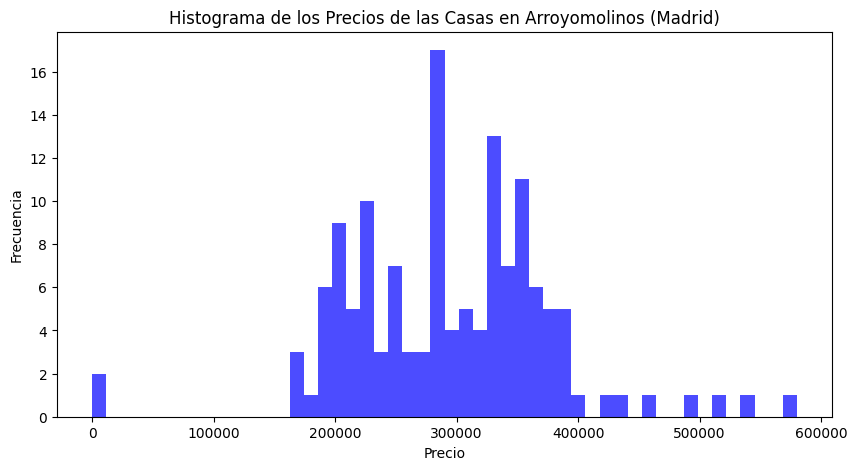

In [11]:
import matplotlib.pyplot as plt

# Filtrar los datos para la población de "Arroyomolinos (Madrid)" en la columna level5
data = exe4[['price']].get_group('Arroyomolinos (Madrid)')

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 5))

# Graficar el histograma
ax.hist(data, bins=50, alpha=0.7, color='blue')

# Establecer el título y las etiquetas
ax.set_title("Histograma de los Precios de las Casas en Arroyomolinos (Madrid)")
ax.set_xlabel('Precio')
ax.set_ylabel('Frecuencia')

# Mostrar la gráfica
plt.show()

**El histograma representa la distribución de precios de las casas en Arroyomolinos (Madrid)**.

•	La mayoría de las viviendas están agrupadas en el rango de precios entre 200,000 y 400,000 euros, con un pico notable alrededor de los 300,000 euros. Esto indica que este rango es el más común en esta localidad.

•	Existe un pequeño número de viviendas en precios cercanos a 0, lo que podría corresponder a datos atípicos, errores, o inmuebles con precios simbólicos.

•	Hay pocos datos en el rango de 400,000 a 600,000 euros, lo que sugiere que las propiedades en este rango son menos frecuentes.

•	La distribución es asimétrica, con una mayor densidad hacia los precios intermedios.

•	Hay una dispersión hacia precios más altos.


#### Ejercicio 09. ¿Son los precios promedios de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios y escribe una conclusión sobre ellos.

In [12]:
# Obtener los precios promedio por grupo
var1 = exe4.get_group('Valdemorillo').agg({'price': ['mean']})
var2 = exe4.get_group('Galapagar').agg({'price': ['mean']})

# Resultado
print("Precios promedio de vivienda:")
print(f"Valdemorillo: {var1.iloc[0, 0]:,.2f}")
print(f"Galapagar: {var2.iloc[0, 0]:,.2f}")

Precios promedio de vivienda:
Valdemorillo: 363,860.29
Galapagar: 360,063.20


#### Ejercicio 10. ¿Son los promedios de precio por metro cuadrado (precio/m2) de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios de precio por metro cuadrado y escribe una conclusión sobre ellos.

Pista: Crea una nueva columna llamada `pps` (*price per square* o precio por metro cuadrado) y luego analiza los valores.

In [13]:
# Calcular el precio por metro cuadrado (precio/superficie) en ambas poblaciones
valdemorillo['price_per_m2'] = valdemorillo['price'] / valdemorillo['surface']
galapagar['price_per_m2'] = galapagar['price'] / galapagar['surface']

# Calcular los promedios de precio por metro cuadrado
precio_promedio_valdemorillo = valdemorillo['price_per_m2'].mean()
precio_promedio_galapagar = galapagar['price_per_m2'].mean()

# Imprimir los resultados
print("Precio promedio por metro cuadrado:")
print(f"Valdemorillo: {precio_promedio_valdemorillo:,.2f} USD/m²")
print(f"Galapagar: {precio_promedio_galapagar:,.2f} USD/m²")

# Comparar los promedios de precio por metro cuadrado
if abs(precio_promedio_valdemorillo - precio_promedio_galapagar) < 0.01:
    print("Los promedios de precio por metro cuadrado son prácticamente los mismos.")
else:
    print("Los promedios de precio por metro cuadrado NO son los mismos.")

NameError: name 'valdemorillo' is not defined

#### Ejercicio 11. Analiza la relación entre la superficie y el precio de las casas. (★★☆)

Pista: Puedes hacer un `scatter plot` y luego escribir una conclusión al respecto.

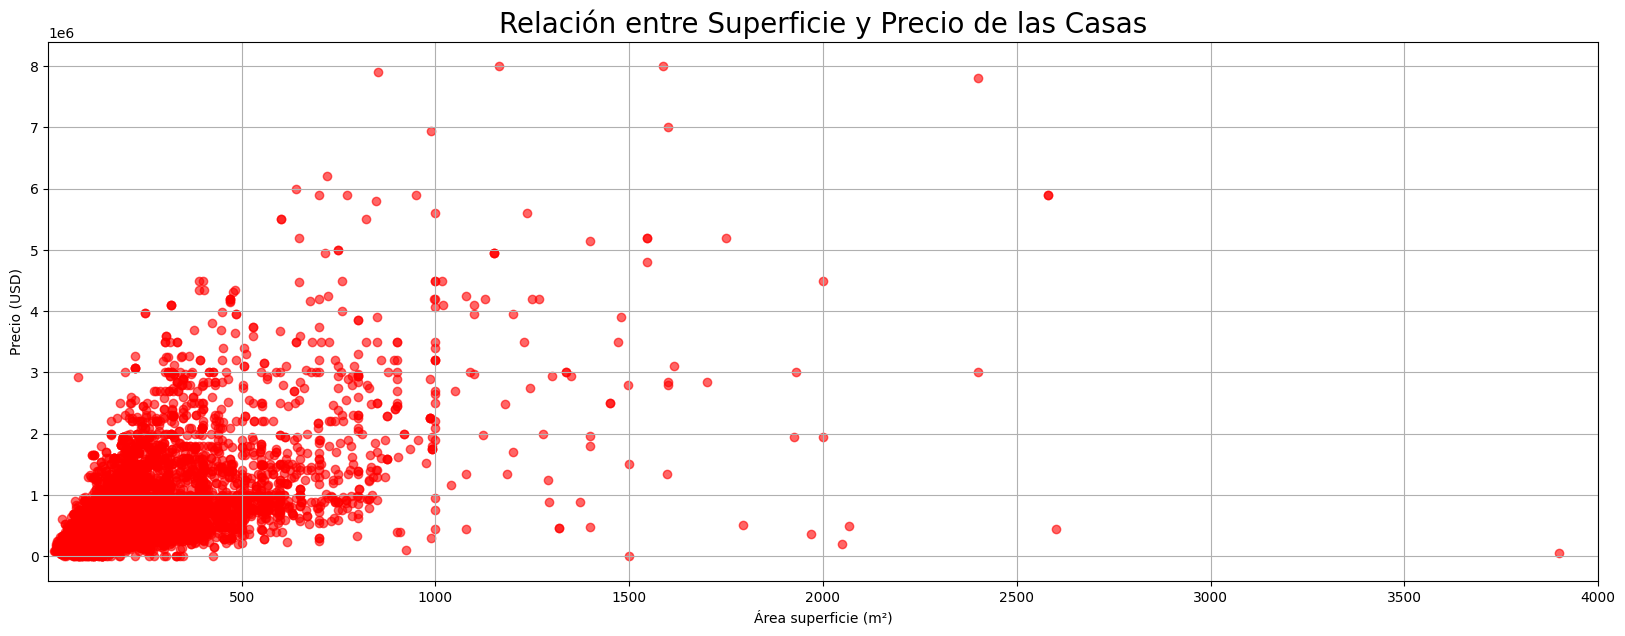

In [ ]:
# Crear el gráfico de dispersión
plt.figure(figsize=(20, 7))
plt.scatter(ds['surface'], ds['price'], color='red', alpha=0.6)

# Establecer etiquetas y título
plt.xlabel('Área superficie (m²)')
plt.ylabel('Precio (USD)')
plt.title("Relación entre Superficie y Precio de las Casas", fontsize=20)

# Ajustar los límites del eje X y añadir cuadrícula
plt.xlim(1, 4000)  # Ajusta según el rango de tu dataset
plt.grid(True)

# Mostrar el gráfico
plt.show()

•	La mayoría de los puntos están concentrados en superficies menores a 500 m², lo que sugiere que las casas en esta área suelen ser más pequeñas.

•	Hay algunos puntos que representan casas con superficies muy grandes (más de 2,000 m²) y precios elevados (hasta $1,000,000 USD), indicando posibles propiedades de lujo o terrenos amplios.

•	Existe una correlación positiva, porque a medida que aumenta la superficie, el precio también tiende a aumentar, aunque con una dispersión considerable.

•	Hay algunas propiedades con precios muy bajos que podrían ser excepciones, como terrenos en mal estado o ventas especiales.

#### Ejercicio 12. ¿Cuántas agencia de bienes raíces contiene el dataset? (★★☆)

Imprime el valor obtenido.

In [483]:
ds['realEstate_name'] = ds['realEstate_name'].str.strip().str.lower()

# Eliminar filas con valores nulos
ds_limpio = ds[ds['realEstate_name'].notna() & (ds['realEstate_name'] != '')]

# Obtener los nombres únicos de las agencias inmobiliarias
agencias_unicas = ds_limpio['realEstate_name'].unique()

# Contar el número de agencias inmobiliarias
num_agencias = len(agencias_unicas)

# Imprimir el resultado
print(f"Número de agencias inmobiliarias: {num_agencias}")

Número de agencias inmobiliarias: 1821


#### Ejercicio 13. ¿Cuál es la población (columna level5) que contiene la mayor cantidad de casas?(★★☆)

Imprima la población y el número de casas.

In [484]:
# Contar las casas por población
cantidad_casas_por_poblacion = ds['level5'].value_counts()

# Obtener la población con la mayor cantidad de casas
poblacion_mayor_cantidad = cantidad_casas_por_poblacion.idxmax()
cantidad_maxima = cantidad_casas_por_poblacion.max()

# Imprimir el resultado
print(f"La población con la mayor cantidad de casas es '{poblacion_mayor_cantidad}' con {cantidad_maxima} casas.")

La población con la mayor cantidad de casas es ' Madrid Capital' con 6643 casas.


#### Ejercicio 14. Ahora vamos a trabajar con el "cinturón sur" de Madrid. Haz un subconjunto del DataFrame original que contenga las siguientes poblaciones (columna level5): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Pista: Filtra el DataFrame original usando la columna `level5` y la función `isin`.

In [485]:
# Filtrar el DataFrame original para las poblaciones del cinturón sur
poblaciones_sur = ['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón']

# Crear el subconjunto del DataFrame
subconjunto_sur = ds[ds['level5'].isin(poblaciones_sur)]

# Mostrar el resultado
print(subconjunto_sur)

       Unnamed: 0  id_realEstates  isNew  \
1               2       153867863  False   
3               4       152776331  False   
85             86       153152077  False   
94             95       153995577  False   
109           110       153586414  False   
...           ...             ...    ...   
15275       15276       153903887  False   
15291       15292       151697757  False   
15305       15306       153902389  False   
15322       15323       153871864  False   
15325       15326       153901467  False   

                                 realEstate_name  phone_realEstate  \
1              tecnocasa fuenlabrada ferrocarril       916358736.0   
3              tecnocasa fuenlabrada ferrocarril       916358736.0   
85                       sinergical inmobiliaria               NaN   
94                               viviendas365com       911226014.0   
109              area uno asesores inmobiliarios       912664081.0   
...                                          ...   

#### Ejercicio 15. Traza un gráfico de barras de la mediana de los precios y explica lo que observas (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprima un gráfico de barras de la mediana de precios y escriba en la celda Markdown un breve análisis sobre el gráfico.

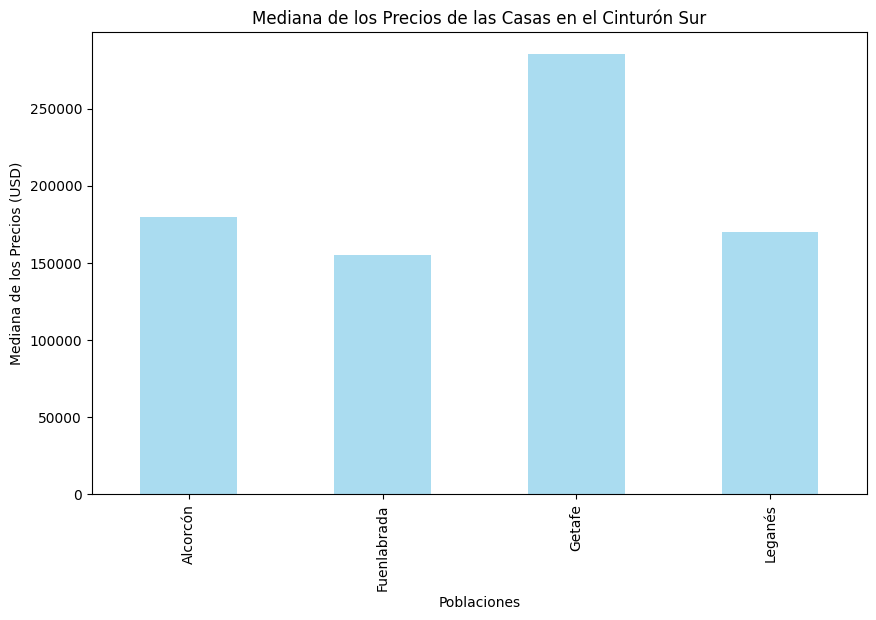

In [ ]:
# Calcular la mediana de los precios por población en el subconjunto del cinturón sur
medianas_precio = subconjunto_sur.groupby('level5')['price'].median()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
medianas_precio.plot(kind='bar', color='skyblue', alpha=0.7)

# Establecer etiquetas y título
plt.xlabel('Poblaciones')
plt.ylabel('Mediana de los Precios (USD)')
plt.title('Mediana de los Precios de las Casas en el Cinturón Sur')

# Mostrar el gráfico
plt.show()

Getafe:

•	Con la mediana más alta, superando los 250,000 USD, Getafe podría ser una de las localidades más demandadas.

Alcorcón:

•	Los precios en Alcorcón rondan los 200,000 USD. Es una localidad con buena conexión al centro de Madrid y áreas comerciales importantes.

•	Podría estar atrayendo a familias y profesionales que buscan un balance entre costo y accesibilidad.

Leganés:

•	Aunque tiene precios más bajos que Alcorcón y Getafe, está más cerca de la mediana de Alcorcón. Esto sugiere un mercado más accesible.

•	Sus precios podrían reflejar una población diversa y un mercado con menos presión inmobiliaria.

Fuenlabrada:

•	Con la mediana más baja, Fuenlabrada podría estar atrayendo compradores que buscan opciones económicas.

•	Esto puede reflejar una menor demanda relativa o un mercado con más disponibilidad de viviendas.



#### Ejercicio 16. Calcula la media y la varianza de muestra para las siguientes variables: precio, habitaciones, superficie y baños (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprime ambos valores por cada variable.

In [487]:
# Calcular la media y la varianza de muestra para las variables 
variables = ['price', 'rooms', 'surface', 'bathrooms']
media_valores = subconjunto_sur[variables].mean()
varianza_valores = subconjunto_sur[variables].var()

# Imprimir los resultados para cada variable
for variable in variables:
    print(f"{variable.capitalize()}:")
    print(f"  Media: {media_valores[variable]:,.2f}")
    print(f"  Varianza: {varianza_valores[variable]:,.2f}")
    print()

Price:
  Media: 223,094.48
  Varianza: 14,921,367,508.05

Rooms:
  Media: 3.02
  Varianza: 0.72

Surface:
  Media: 111.75
  Varianza: 4,263.05

Bathrooms:
  Media: 1.63
  Varianza: 0.57



#### Ejercicio 17. ¿Cuál es la casa más cara de cada población? Debes usar el subset obtenido en la pregunta 14 (★★☆)

Imprime tanto la dirección como el precio de la casa seleccionada de cada población. Puedes imprimir un DataFrame o una sola línea para cada población.

In [488]:
# Obtener la casa más cara de cada población
casa_mas_cara_por_poblacion = subconjunto_sur.loc[subconjunto_sur.groupby('level5')['price'].idxmax()]

# Imprimir los resultados (dirección y precio) 
for index, row in casa_mas_cara_por_poblacion.iterrows():
    print(f"Población: {row['level5']} - Dirección: {row['address']} - Precio: {row['price']:,} USD")

Población: Alcorcón - Dirección: Alcorcón - Precio: 950,000 USD
Población: Fuenlabrada - Dirección: Calle de Paulo Freire, 5, Fuenlabrada - Precio: 490,000 USD
Población: Getafe - Dirección: Getafe - Precio: 1,050,000 USD
Población: Leganés - Dirección: Avenida Reina Sofía, Leganés - Precio: 650,000 USD


#### Ejercicio 18. Normaliza la variable de precios para cada población y traza los 4 histogramas en el mismo gráfico (debes usar el subconjunto obtenido en la pregunta 14) (★★★)

Para el método de normalización, puedes usar el que consideres adecuado, no hay una única respuesta correcta para esta pregunta. Imprime el gráfico y escribe en la celda de Markdown un breve análisis sobre el gráfico.

Pista: Puedes ayudarte revisando la demostración multihist de Matplotlib.

/tmp/ipykernel_10257/3827785862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subconjunto_sur['normalized_price'] = subconjunto_sur.groupby('level5')['price'].transform(


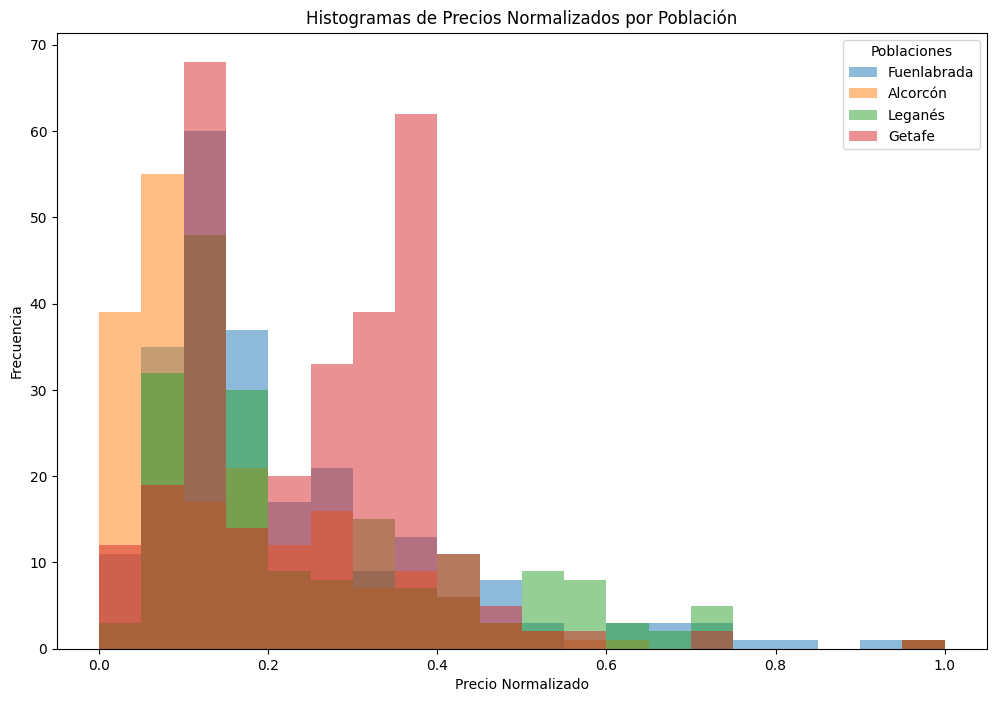

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Inicializar el normalizador
scaler = MinMaxScaler()

# Normalizar los precios para cada población
# Se aplica la normalización por población
subconjunto_sur['normalized_price'] = subconjunto_sur.groupby('level5')['price'].transform(
    lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten())  # Usamos .flatten() para convertir a 1D

# Crear el gráfico de histogramas
plt.figure(figsize=(12, 8))

# Traza un histograma para cada población
for poblacion in subconjunto_sur['level5'].unique():
    data = subconjunto_sur[subconjunto_sur['level5'] == poblacion]['normalized_price']
    plt.hist(data, bins=20, alpha=0.5, label=f'{poblacion}')

# Establecer etiquetas y título
plt.xlabel('Precio Normalizado')
plt.ylabel('Frecuencia')
plt.title('Histogramas de Precios Normalizados por Población')
plt.legend(title='Poblaciones')


plt.show()

•	La mayoría de los precios están concentrados en los rangos más bajos de la normalización (cerca de 0.0 a 0.2).

•	Getafe  (rojo): Presenta un mayor número de viviendas con precios más elevados (entre 0.2 y 0.4) en comparación con las demás localidades.

•	Alcorcón (naranja): Tiene una concentración alta en precios más bajos (0.0 a 0.2), pero también se extiende hacia valores intermedios.

•	Leganés (verde): Muestra una distribución menos concentrada, con algunas viviendas en precios más altos (hasta 0.6).

•	Fuenlabrada (azul): Tiene la mayor proporción de precios en el rango más bajo (0.0 a 0.1), confirmando su carácter más accesible.

•	Getafe destaca por una mayor proporción de viviendas con precios más altos, mientras que Fuenlabrada es más asequible. Alcorcón y Leganés se sitúan en posiciones intermedias, con distribuciones variadas.


#### Ejercicio 19. ¿Qué puedes decir sobre el precio por metro cuadrado (precio/m2) entre los municipios de 'Getafe' y 'Alcorcón'? Debes usar el subconjunto obtenido en la pregunta 14 (★★☆)

Pista: Crea una nueva columna llamada `pps` (price per square en inglés) y luego analiza los valores

      price  surface          pps
1     89000      NaN          NaN
3     89000     86.0  1034.883721
85   107000     50.0  2140.000000
94   320000    120.0  2666.666667
109  425000    142.0  2992.957746

Análisis de 'Precio por Metro Cuadrado' (pps):
Media: 2032.65 USD/m²
Mediana: 1944.44 USD/m²
Máximo: 3917.53 USD/m²
Mínimo: 0.00 USD/m²


/tmp/ipykernel_10257/921618952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subconjunto_sur['pps'] = subconjunto_sur['price'] / subconjunto_sur['surface']


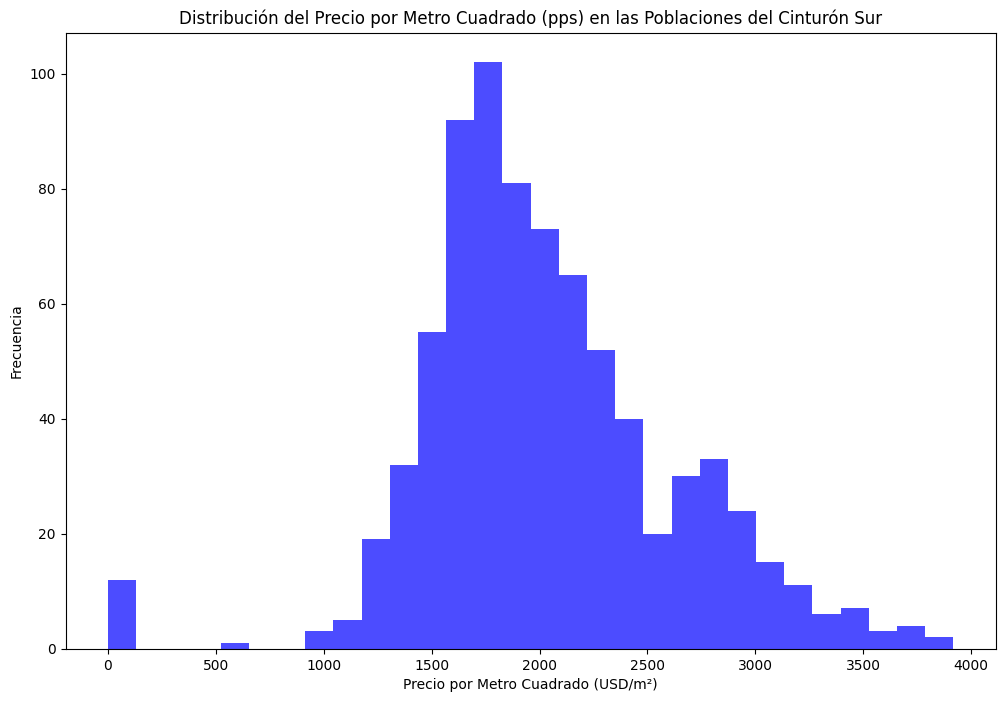

In [ ]:
# Crear la columna 'pps' (precio por metro cuadrado)
subconjunto_sur['pps'] = subconjunto_sur['price'] / subconjunto_sur['surface']

# Mostrar las primeras filas para verificar la creación de la columna
print(subconjunto_sur[['price', 'surface', 'pps']].head())

# Análisis básico de la columna 'pps'
media_pps = subconjunto_sur['pps'].mean()
mediana_pps = subconjunto_sur['pps'].median()
max_pps = subconjunto_sur['pps'].max()
min_pps = subconjunto_sur['pps'].min()

# Imprimir el análisis de 'pps'
print("\nAnálisis de 'Precio por Metro Cuadrado' (pps):")
print(f"Media: {media_pps:.2f} USD/m²")
print(f"Mediana: {mediana_pps:.2f} USD/m²")
print(f"Máximo: {max_pps:.2f} USD/m²")
print(f"Mínimo: {min_pps:.2f} USD/m²")

# Visualización: Histograma de 'pps'
plt.figure(figsize=(12, 8))
plt.hist(subconjunto_sur['pps'], bins=30, alpha=0.7, color='blue')
plt.xlabel('Precio por Metro Cuadrado (USD/m²)')
plt.ylabel('Frecuencia')
plt.title('Distribución del Precio por Metro Cuadrado (pps) en las Poblaciones del Cinturón Sur')
plt.show()

•	La distribución parece ser unimodal y algo asimétrica hacia la derecha. Esto indica que la mayoría de los precios están concentrados en un rango más bajo, pero existen valores más altos que extienden la cola derecha.

•	 El rango de precios más frecuente parece estar entre 1,500 y 2,000 USD/m².

•	 Hay algunos valores muy bajos cerca de 0 USD/m², que podrían ser datos atípicos o áreas con características especiales.

•	 La mayoría de las propiedades en el Cinturón Sur tienen precios moderados, aunque hay una pequeña proporción de propiedades más caras, lo que podría reflejar diferencias en las características de las propiedades o en la ubicación específica dentro de la región.


#### Ejercicio 20. Realiza el mismo gráfico para 4 poblaciones diferentes (columna level5) y colócalos en el mismo gráfico. Debes usar el subconjunto obtenido en la pregunta 14 (★★☆) 
Pista: Haz un diagrama de dispersión de cada población usando subgráficos (subplots).

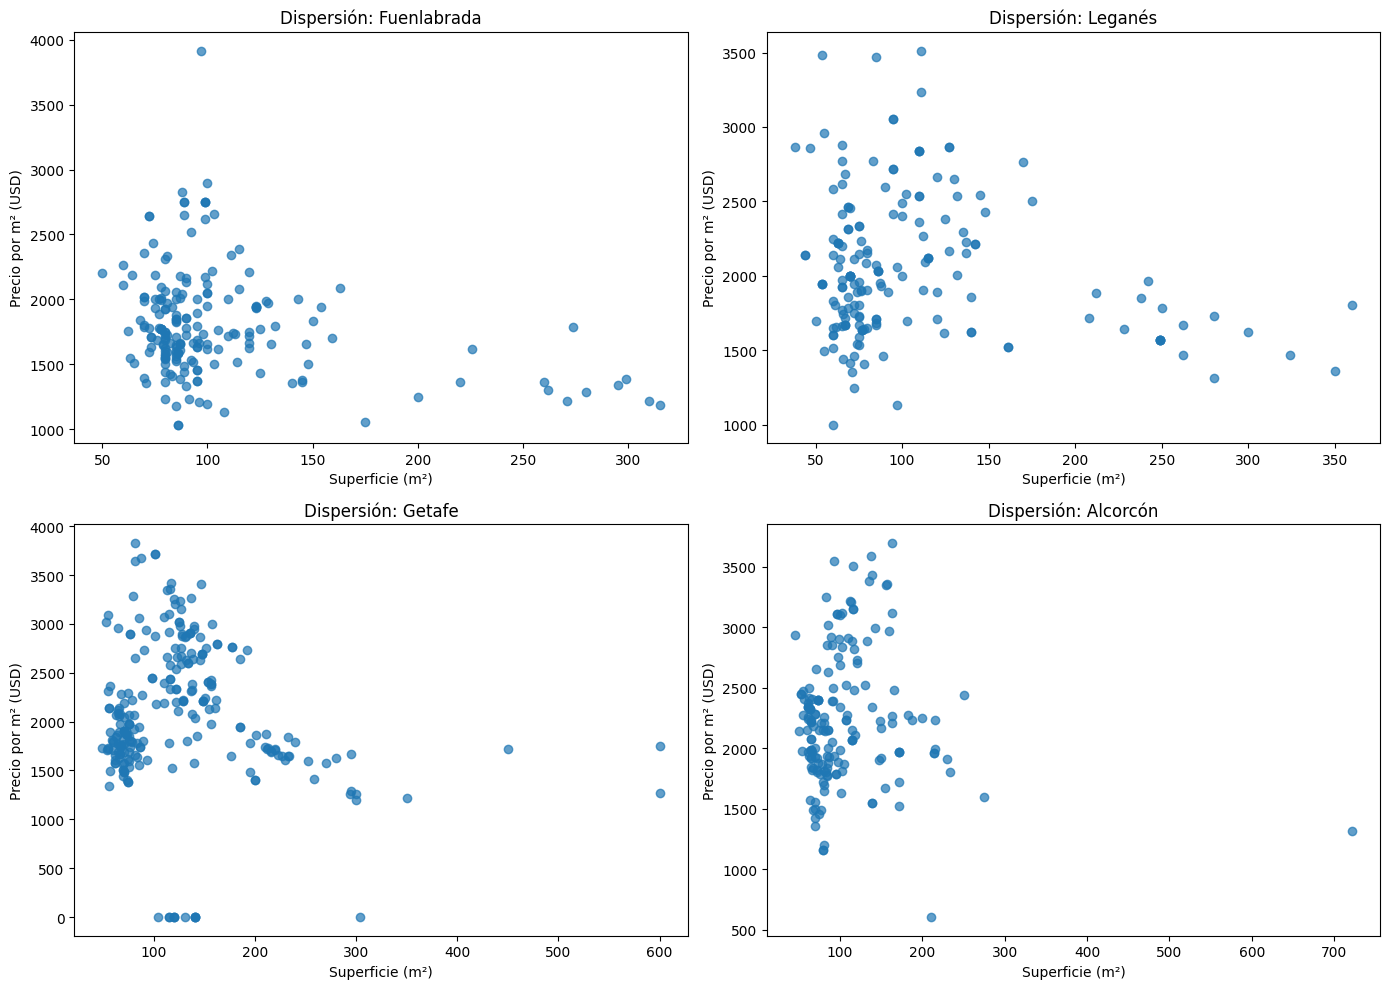

In [ ]:
# Seleccionar las 4 poblaciones para el análisis (puedes elegir otras si lo prefieres)
poblaciones_analizar = ['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón']

# Filtrar el subconjunto para solo las poblaciones seleccionadas
subconjunto_filtrado = subconjunto_sur[subconjunto_sur['level5'].isin(poblaciones_analizar)]

# Crear los subgráficos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Iterar sobre las poblaciones y crear un diagrama de dispersión para cada una
for i, poblacion in enumerate(poblaciones_analizar):
    # Seleccionar el eje correspondiente
    ax = axes[i // 2, i % 2]
    
    # Filtrar los datos de la población actual
    data = subconjunto_filtrado[subconjunto_filtrado['level5'] == poblacion]
    
    # Crear el diagrama de dispersión
    ax.scatter(data['surface'], data['pps'], alpha=0.7)
    
    # Establecer el título y etiquetas para cada subgráfico
    ax.set_title(f'Dispersión: {poblacion}')
    ax.set_xlabel('Superficie (m²)')
    ax.set_ylabel('Precio por m² (USD)')

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#### Ejercicio 21. Realiza un trazado de las coordenadas (columnas latitud y longitud) del cinturón sur de Madrid por color de cada población (debes usar el subconjunto obtenido del Ejercicio 14) (★★★★)

Ejecuta la siguiente celda y luego comienza a codear en la siguiente. Debes implementar un código simple que transforme las columnas de coordenadas en un diccionario de Python (agrega más información si es necesario) y agrégala al mapa.

In [529]:
from ipyleaflet import Map, basemaps,Marker, Icon

# Mapa centrado en (60 grados latitud y -2.2 grados longitud)
# Latitud, longitud
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.OpenStreetMap.Mapnik)

In [530]:
coordenadas_por_poblacion = {}

# Recorrer cada población en el subconjunto para almacenar las coordenadas
for index, row in subconjunto_sur.iterrows():
    poblacion = row['level5']
    latitud = row['latitude']
    longitud = row['longitude']
    
    # Agregar las coordenadas al diccionario por población
    if poblacion not in coordenadas_por_poblacion:
        coordenadas_por_poblacion[poblacion] = []
    
    coordenadas_por_poblacion[poblacion].append((latitud, longitud))

# Crear un diccionario de colores para cada población
colores_poblacion = {
    'Fuenlabrada': 'red',
    'Leganés': 'blue',
    'Getafe': 'green',
    'Alcorcón': 'orange'
}

# Mostrar las coordenadas organizadas por población
for poblacion, coordenadas in coordenadas_por_poblacion.items():
    print(f"Población: {poblacion} - Coordenadas: {coordenadas}")

Población: Fuenlabrada - Coordenadas: [('40,28674', '-3,79351'), ('40,2853785786438', '-3,79508142135624'), ('40,2744807718156', '-3,79192471504211'), ('40,2906814213562', '-3,80405242135624'), ('40,3152529585', '-3,8365174323'), ('40,2921796', '-3,815865'), ('40,29224', '-3,83833'), ('40,31381', '-3,83733'), ('40,29742', '-3,80916'), ('40,3133562', '-3,8360052'), ('40,27782', '-3,80908'), ('40,2919082135624', '-3,82411851356237'), ('40,31381', '-3,83733'), ('40,2889244', '-3,7985458'), ('40,2837261', '-3,7907629'), ('40,2823585', '-3,8061052'), ('40,2830905213562', '-3,80549367864376'), ('40,296075', '-3,80790299999994'), ('40,2772542', '-3,7907283'), ('40,296075', '-3,80790299999994'), ('40,2772542', '-3,7907283'), ('40,2915427786438', '-3,79755132135624'), ('40,28293', '-3,80959'), ('40,29338', '-3,82598'), ('40,2871968', '-3,7917573'), ('40,2890264864376', '-3,81057698643763'), ('40,2833037', '-3,78627316'), ('40,288330005557', '-3,7994911074191'), ('40,288095391725', '-3,800040741